# Problem Set 4

See “Check Your Understanding” from [Applied Linear Algebra](../scientific/applied_linalg.ipynb) and [Randomness](../scientific/randomness.ipynb)

## Question 1 and 2

Alice is a stock broker who owns two types of assets: A and B. She owns 100
units of asset A and 50 units of asset B. The current interest rate is 5%.
Each of the A assets have a remaining duration of 6 years and pay
$ 1500 $ dollars each year while each of the B assets have a remaining duration
of 4 years and pay $ 500 $ dollars each year (assume the first payment starts at the beginning of the
first year and hence, should not be discounted).

### Question 1

Alice would like to retire if she
can sell her assets for more than \$1 million. Use vector addition, scalar
multiplication, and dot products to determine whether she can retire.

In [1]:
import numpy as np

nA = 100
nB = 50
nassets = np.array([nA, nB])

r = 0.05
durationA = 6
durationB = 4

# Do your computations here
duration = np.array([durationA, durationB])
discount = np.array([(1-1/((1+r)**t))/(1-(1/(1+r))) for t in duration])

# Compute price
payoff = np.array([1500, 500]) # payoffs
npv=payoff*discount
price=nassets@npv

if price>=1e6:
    print("Alice can retire")
else:
    print("Alice cannot retire yet")

Alice cannot retire yet


### Question 2

Consider if Alice had several alternate portfolios and decide which is the most valuable.
Use a matrix product to simultaneously calculate the values of each portfolio,
as we did in the lecture notes.

- Portfolio 1: 100 units of A, 40 units of B  
- Portfolio 2: 50 units of A, 150 units of B  
- Portfolio 3: 120 units of A, 0 units of B  

In [2]:
nassets=np.array([[100,40],[50,150],[120,0]])
price=nassets@npv
print(price)

[873886.46118203 678954.3525001  959305.80071355]


## Question 3

As in [Applied Linear Algebra](../scientific/applied_linalg.ipynb):

Consider an economy where in any given year, $ \alpha = 3\% $ of workers lose their jobs and
$ \phi = 12\% $ of unemployed workers find jobs.

Define the vector $ x_0 = \begin{bmatrix} 600,000 & 200,000 \end{bmatrix} $ as the number of
employed and unemployed workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the unemployment rate over time in this economy for $ t = 0, \ldots 20 $ (i.e. number of employed over total number of workers).

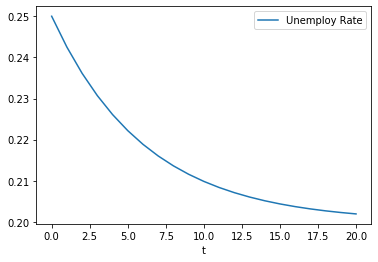

In [3]:
import matplotlib.pyplot as plt

phi = 0.12
alpha = 0.03

x0 = np.array([600_000, 200_000])

A = np.array([[1-alpha, alpha], [phi, 1-phi]])

def simulate(x0, A, T=10):
    """
    Simulate the dynamics of unemployment for T periods starting from x0
    and using values of A for probabilities of moving between employment
    and unemployment
    """
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0

    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]
    
    return out

def plot_simulation(x0, A, T=100):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    total_pop = np.sum(X,axis=1)
    ax.plot(X[:, 1]/total_pop)
    ax.set_xlabel("t")
    ax.legend(["Unemploy Rate"])
    return ax

plot_simulation(x0, A, 21);

Continue the simulation for 1000 periods to find a long-run unemployment rate.

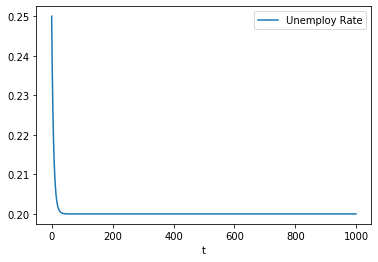

In [4]:
plot_simulation(x0, A, 1000);

Adapt the lecture notes code to use the matrix you set up for the evolution equation, and
find the (left) eigenvector associated with the unit eigenvalue.  Rescale this as required (i.e.
it is only unique up to a scaling parameter) to find the stationary unemployment rate. Compare to the simulated
one.

In [5]:
eigvals, eigvecs = np.linalg.eig(A.T)
for i in range(len(eigvals)):
    if eigvals[i] == 1:
        which_eig = i
        break
        
dist = eigvecs[:, which_eig]
# need to divide by sum so it adds to 1
dist /= dist.sum()
print(f"The distribution of workers is given by {dist}")

The distribution of workers is given by [0.8 0.2]


## Question 4

Adapt our unemployment example to add in an additional category: a probationary period where a firm is deciding if they want to make
an employee a permanent offer.  Now, in any given year
-  $ \alpha = 3\% $ of workers with full job offers lose their jobs.
-  $ \phi = 12\% $ of unemployed workers find a “probationary” job (i.e., they cannot get the permanent job directly).
-  Probation lasts for exactly an entire period, at which point $ \lambda = 60\% $ of the employees get a permanent job offer, while the remainder become unemployed.

Define the vector $ x_0 = \begin{bmatrix} 600,000 & 200,000 & 100,000\end{bmatrix} $ as the number of
fully employed, unemployed, and probationary workers (respectively) at time $ 0 $ in the economy.

Adapting the code from the lecture notes, plot the mass of all three types of employment situations in this economy for $ t = 0, \ldots 20 $.

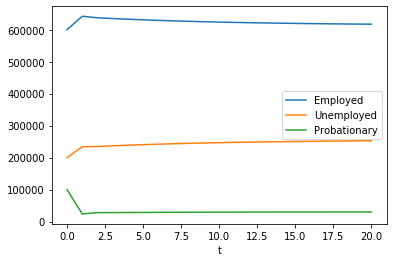

In [6]:
x0 = np.array([600_000, 200_000, 100_000])

A = np.array([[0.97, 0.03, 0], [0, 0.88, 0.12], [0.6, 0.4, 0]])

def plot_simulation(x0, A, T=100):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    ax.plot(X[:, 0])
    ax.plot(X[:, 1])
    ax.plot(X[:, 2])
    ax.set_xlabel("t")
    ax.legend(["Employed", "Unemployed","Probationary"])
    return ax

plot_simulation(x0, A, 21);

## Question 5

Wikipedia and other credible statistics sources tell us that the mean and
variance of the Uniform(0, 1) distribution are (1/2, 1/12) respectively.

How could we check whether the numpy random numbers approximate these
values? (*hint*: some functions in [Introduction to Numpy](../scientific/numpy_arrays.ipynb) and [Randomness](../scientific/randomness.ipynb) might be useful)

In [7]:
u=np.random.rand(100000)
print(u.mean(),u.var())

0.49879119485639034 0.083333949863315


## Question 6

Assume you have been given the opportunity to choose between one of three financial assets.

You will be given the asset for free, allowed to hold it indefinitely, and will keep all payoffs.

Also assume the assets’ payoffs are distributed as follows (the notations are the same as in “Continuous Distributions” subsection of [Randomness](../scientific/randomness.ipynb)):

1. Normal with $ \mu = 10, \sigma = 5 $  
1. Gamma with $ k = 5.3, \theta = 2 $  
1. Gamma with $ k = 5, \theta = 2 $  


Use `scipy.stats` to answer the following questions:

- Which asset has the highest average returns?  
- Which asset has the highest median returns?  
- Which asset has the lowest coefficient of variation, i.e., standard deviation divided by mean? (This measure is similar to “Sharpe Ratio”)  
- Which asset would you choose? Why? (There is not a single right answer here. Just be creative and express your preferences.)  


You can find the official documentation of `scipy.stats` [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [8]:
import scipy.stats as st

x1 = st.norm(10.0, 5.0)
x2 = st.gamma(5.3, scale=2)
x3 = st.gamma(5, scale=2)

print(x1.mean(),x1.median(),x1.std()/x1.mean())
print(x2.mean(),x2.median(),x2.std()/x2.mean())
print(x3.mean(),x3.median(),x3.std()/x3.mean())

10.0 10.0 0.5
10.6 9.941306258096537 0.43437224276306935
10.0 9.34181776559197 0.447213595499958


## Question 7

Let’s revisit the unemployment example from the [Applied Linear Algebra](../scientific/applied_linalg.ipynb).

We’ll repeat necessary details here.

Consider an economy where in any given year, $ \alpha = 5\% $ of workers lose their jobs, and
$ \phi = 10\% $ of unemployed workers find jobs.

Initially, 90% of the 1,000,000 workers are employed.

Suppose that the average employed worker earns 10 dollars while an unemployed worker
earns 1 dollar per period.

With this, do the following:

- Represent this problem as a Markov chain by defining the three components defined above  

In [9]:
import quantecon as qe

# define components here
# 1. State description
state_values = ["Employment", "Unemployment"]

# 2. Transition probabilities
P = np.array([[0.95, 0.05], [0.1, 0.9]])

# 3. Initial distribution
x0 = np.array([0.9, 0.1])

- Construct an instance of the QuantEcon MarkovChain using the objects defined in part 1.  

In [10]:
# construct the Markov chain
mc = qe.markov.MarkovChain(P, state_values)

- Simulate the Markov chain 5 times for 50 time periods starting from an employment state and plot the chains over time (see helper code below).  

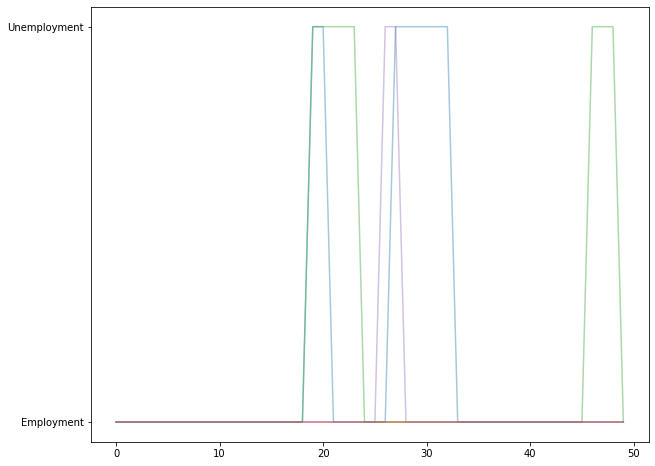

In [11]:
n = 50
M = 5

sim = mc.simulate(n, init = "Employment", num_reps = M)
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(M):
    ax.plot(range(50), sim[i,:], alpha=0.4);

- Using the approach above, simulate the Markov chain `M=20` times for 50 time periods. Instead of starting from an employment state, start off the `M` in proportion to the initial condition above (i.e. 90% of them in an employment state and 10% in an unemployment state). (Hint: you can pass a list to the `init` parameter in the `simulate` function.)  


With this simulation, plot the average proportion of `M` agents in the employment state (i.e. it should start at 0.90 from the initial condition).

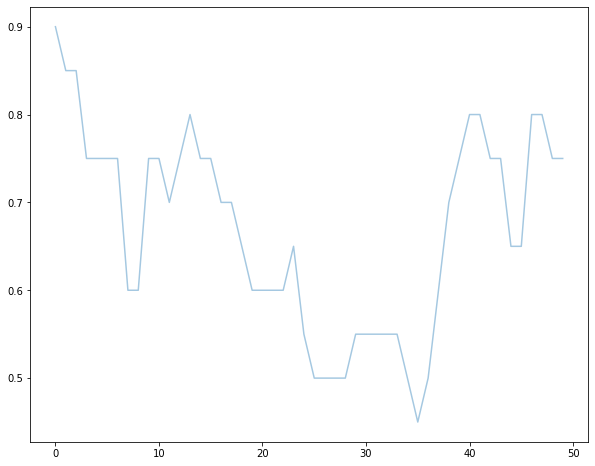

In [12]:
inits=[0]*18+[1]*2
sim = mc.simulate_indices(n, init = inits)
sim_em_prop = 1-np.mean(sim,axis=0)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(n), sim_em_prop, alpha=0.4);

- Calculate the steady-state of the Markov chain and compare results from this simulation to the steady-state unemployment rate for the Markov chain (on a similar graph).  

[0.66666667 0.33333333]


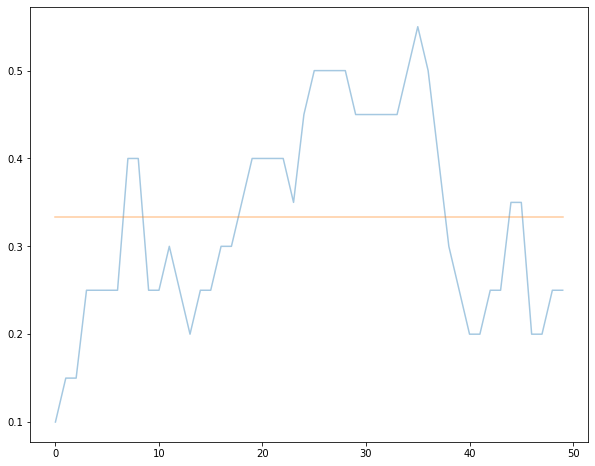

In [13]:
steady_state=mc.stationary_distributions[0]
print(steady_state)
sim_unem_prop = np.mean(sim,axis=0)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(n), sim_unem_prop, alpha=0.4)
ax.plot(range(n), [steady_state[1]]*n, alpha=0.4);

- Determine the average long-run payment for a worker in this setting. (Hint: Think about the stationary distribution)  

In [14]:
# Long-run average payment
payment=[sum(i)+10*(50-sum(i)) for i in sim]
print(np.mean(payment))

351.05
